In [2]:
import numpy as np 
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm
from collections import Counter                      
import matplotlib.pyplot as plt             
%matplotlib inline    
%config IPCompleter.greedy=True
sns.set(color_codes=True)
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier
#import xgboost as xgb
#from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import os

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("default_of_cc_clients.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
df.shape

(30000, 25)

In [7]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 25)


In [8]:
df = df.drop_duplicates()
df.shape

(30000, 25)

In [9]:
print(df.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [10]:
df = df.dropna()    # Dropping the missing values.
df.count()

ID                            30000
LIMIT_BAL                     30000
SEX                           30000
EDUCATION                     30000
MARRIAGE                      30000
AGE                           30000
PAY_0                         30000
PAY_2                         30000
PAY_3                         30000
PAY_4                         30000
PAY_5                         30000
PAY_6                         30000
BILL_AMT1                     30000
BILL_AMT2                     30000
BILL_AMT3                     30000
BILL_AMT4                     30000
BILL_AMT5                     30000
BILL_AMT6                     30000
PAY_AMT1                      30000
PAY_AMT2                      30000
PAY_AMT3                      30000
PAY_AMT4                      30000
PAY_AMT5                      30000
PAY_AMT6                      30000
default payment next month    30000
dtype: int64

In [11]:
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

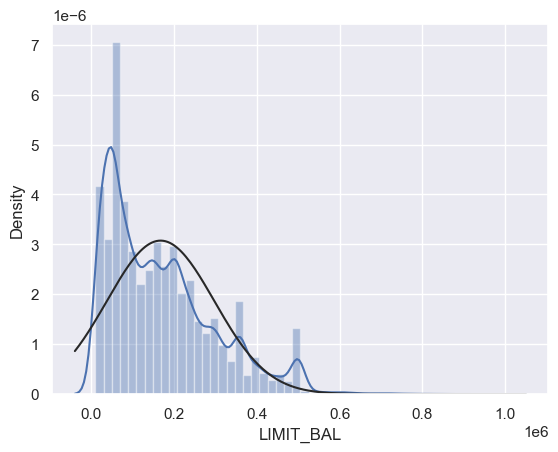

In [12]:
sns.distplot(df['LIMIT_BAL'],fit = norm)

<AxesSubplot:xlabel='MARRIAGE', ylabel='Density'>

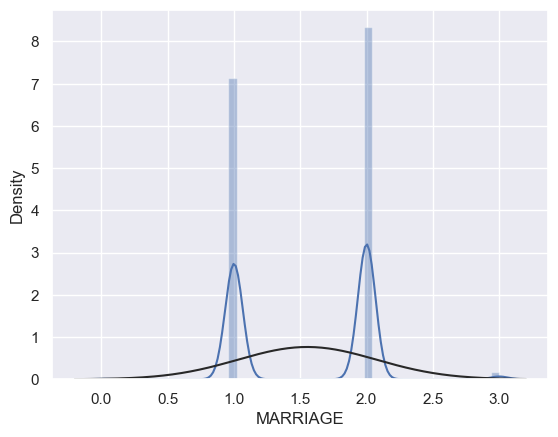

In [13]:
sns.distplot(df['MARRIAGE'],fit = norm)

<AxesSubplot:xlabel='EDUCATION', ylabel='Density'>

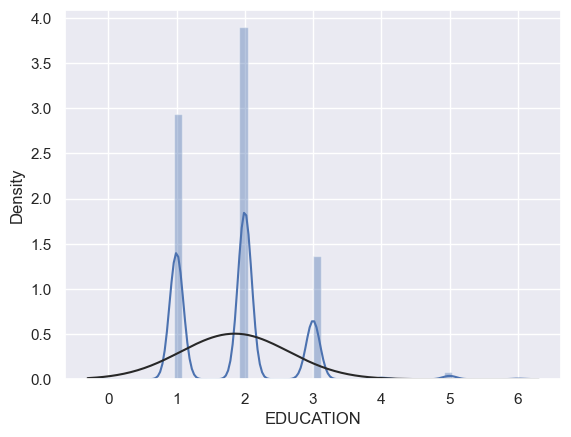

In [14]:
sns.distplot(df['EDUCATION'],fit = norm)

<AxesSubplot:xlabel='AGE', ylabel='Density'>

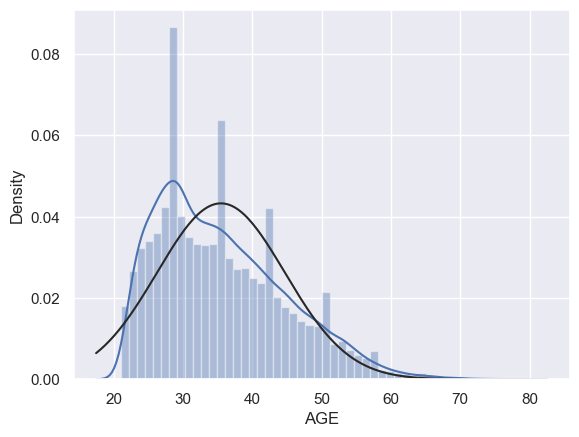

In [15]:
sns.distplot(df['AGE'],fit = norm)

In [16]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,ID,BILL_AMT2,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,PAY_AMT2,PAY_AMT1,BILL_AMT6,BILL_AMT5,...,PAY_5,PAY_4,PAY_3,PAY_2,PAY_0,AGE,MARRIAGE,EDUCATION,SEX,default payment next month
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Sort the repayment status codes in PAY_X columns by melting them into 1 column
# Notice there are 2 undocumented codes: 0,-2

pay = df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
pay_melt = pd.melt(pay)
print(pay_melt['value'].value_counts())

 0    95919
-1    34640
-2    24415
 2    18964
 1     3722
 3     1430
 4      453
 7      218
 5      137
 6       74
 8       28
Name: value, dtype: int64


#  What does 'default.payment.next.month' mean?
Is it a predictor or actual data that was collected in the next month - Oct. 2005? According to the reply from the dataset contributor,it seems this is the actual data collected in the next month. "Y: client's behavior; Y=0 then not default, Y=1 then default". This information could be used to test the accuracy of the model that will be built.

In [18]:
# Get the proportion of customers who had default payment in the next month (Oct.2005)? 
# About 22% customers had default payment next month

df['default payment next month'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

# (3) Identify outliers

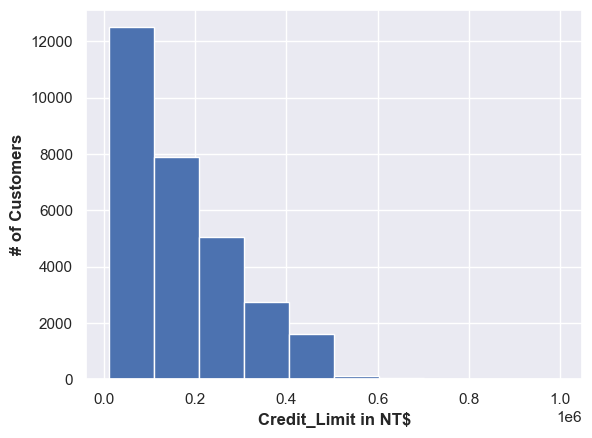

In [19]:
# Use histogram to view the distribution of credit limit

plt.hist(df["LIMIT_BAL"])
plt.xlabel('Credit_Limit in NT$', fontweight='bold')
plt.ylabel('# of Customers', fontweight='bold')
plt.show()

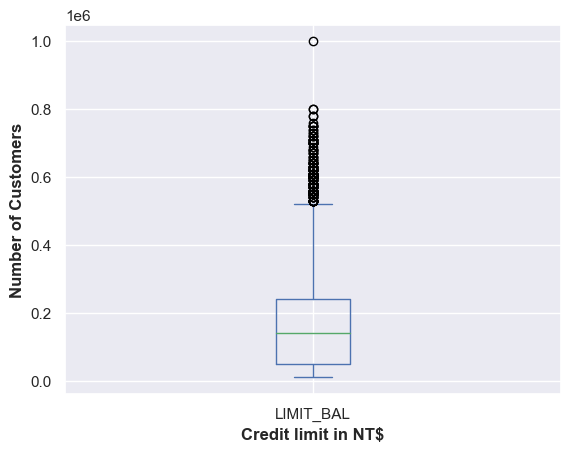

In [20]:
# Use boxplot to identify any outlier in credit limit

df["LIMIT_BAL"].plot(kind="box")
plt.xlabel('Credit limit in NT$', fontweight='bold')
plt.ylabel('Number of Customers', fontweight='bold')
plt.show()

In [21]:
# Take a close look at the outlier
# The observations from other columns indicate that this was just a customer who has an excellent payment history
# Therefore it should be considered as a valid data

outliers = df.loc[df['LIMIT_BAL']>900000]
outliers

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2197,2198,1000000,2,1,1,47,0,0,0,-1,...,891586,927171,961664,50784,50723,896040,50000,50000,50256,0


# (4) Check numerical columns

In [22]:
# Get the statistic summary of the columns
# No data is extremly unresonable in these columns

df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# (4) Check categorical columns

In [23]:
# Get SEX column's distribution. 1: male; 2: female
# No undocumented SEX code

df["SEX"].value_counts()


2    18112
1    11888
Name: SEX, dtype: int64

In [24]:
# Change sex code to 'F' and 'M' and use category as datatype

df["SEX"]=df["SEX"].map({1:'M',2:'F'}).astype('category')
df["SEX"].dtypes

CategoricalDtype(categories=['F', 'M'], ordered=False)

In [25]:
# EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

df["EDUCATION"].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [26]:
# Get the total counts of each EDUCATION level

df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [27]:
# Change values 4, 5, 6 to 0 and define 0 as 'others'
# 1=graduate school, 2=university, 3=high school, 0=others

df["EDUCATION"] = df["EDUCATION"].replace({4:0,5:0,6:0})
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

'MARRIAGE' column: what does 0 mean in 'MARRIAGE'? Since there are only 0.18% (or 54) observations of 0, we will combine 0 and 3 in one value as 'others'.

In [28]:
# From dataset description: MARRIAGE: Marital status (1=married, 2=single, 3=others), but there is also 0

df["MARRIAGE"].unique()

array([1, 2, 3, 0], dtype=int64)

In [29]:
# How many customers had "MARRIAGE" status as 0?

df["MARRIAGE"].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: MARRIAGE, dtype: float64

In [30]:
# Combine 0 and 3 by changing the value 0 into 3

df["MARRIAGE"] = df["MARRIAGE"].replace({0:3})
df["MARRIAGE"].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.012567
Name: MARRIAGE, dtype: float64

# 5. Trends, Hypotheses and Findings

In [31]:
# Set ID as dataframe index

df.set_index('ID', inplace = True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,F,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,F,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,F,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,F,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,M,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [32]:
# Create a new column "HAS_DEF" to indicate customers who have at least 1 deafult payment from PAY_1 to Pay_6
# 0 : no default ; 1: has default
def_condition = (df.PAY_0 >1) | (df.PAY_2 >1) | (df.PAY_3 >1) | (df.PAY_4 >1) | (df.PAY_5 >1) | (df.PAY_6 >1)
df.loc[def_condition, "HAS_DEF"] = 1
df.loc[df.HAS_DEF.isna(), "HAS_DEF"] = 0
df['HAS_DEF'] = df['HAS_DEF'].astype('int64')
df['SEX'] = df['SEX'].astype('int64')
df['AGE'] = df['AGE'].astype('int64')
df.info()

ValueError: Cannot cast object dtype to int64

In [33]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,HAS_DEF
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,F,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,1
2,120000,F,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,1
3,90000,F,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,0
4,50000,F,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0
5,50000,M,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,0


In [34]:
# Define a function to plot stacked bar chart since there will be multiple stacked bars charts to plot

def create_stacked_bar(column_name):

    # Get the percentage of default by each group
    default_by_group = pd.crosstab(index=df['HAS_DEF'],columns = df[column_name], normalize = 'columns')
    
    # Round up to 2 decimal
    default_by_group = default_by_group.apply(lambda x: round(x,2))
    
    labels = default_by_group.columns
    list1 = default_by_group.iloc[0].to_list()
    list2 = default_by_group.iloc[1].to_list()
    
    list1_name = "No default"
    list2_name = "Has default"
    title = f"Default by {column_name}"
    xlabel = column_name
    ylabel = "Default percentage"
    
    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.5
    
    ax1 = ax.bar(labels,list1, bar_width, label = list1_name)
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name)

    ax.set_title(title, fontweight = "bold")
    ax.set_xlabel(xlabel, fontweight = "bold")
    ax.set_ylabel(ylabel, fontweight = "bold")
    ax.legend(loc="best")
    
    plt.xticks(list(range(len(labels))), labels,rotation=90)
    plt.yticks(fontsize=9)

    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")

    plt.show()

(1) On average, which sex group tends to have more delayed payments? Since there are more female than male in the dataset, we will use percentage within each sex group.
30% male have default payment while 26% female have default payment, the difference is not significant.

# (2) Did customers with higher education have less delayed payment?
The data indicates customers with lower education levels default more. Customers with high school and university educational level had higher default percentages than customers with grad school education did.

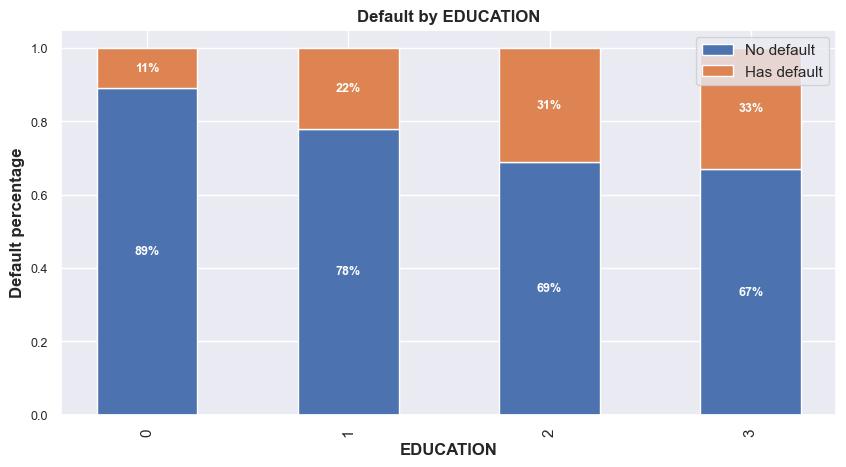

In [35]:
# Plot a stacked bar chart to show default by education level

create_stacked_bar('EDUCATION')


# (3) Did customers with a high education level get higher credit limits?
From the boxplot, we can see that customers with grad school education have the highest 25% percentile,highest median,highest 75th percentile and highest maximum numbers, which proves that customers with higher education levels did get higher credit limits.

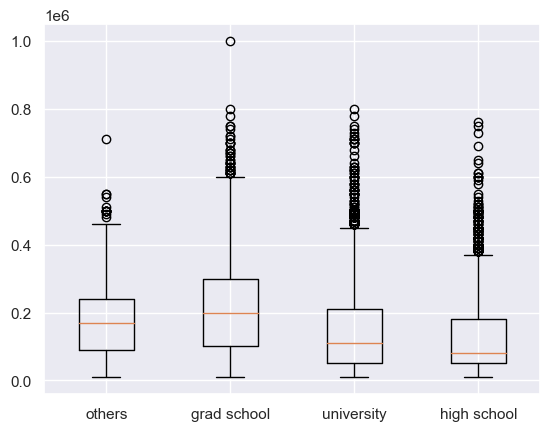

In [36]:
# Use boxplot to visualize credit limit grouped by education level

data = []
for i in [0,1,2,3]:
    temp = df.loc[df.EDUCATION == i, "LIMIT_BAL"]
    data.append(temp)

fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(["others","grad school", "university", "high school"])

plt.show()

(4) Does marital status have anything to do with default risk? Note the credit limit includes the family's total credit.
There is no difference of default risk in terms of marital status, although the 'other'marital status group had high default percentage.

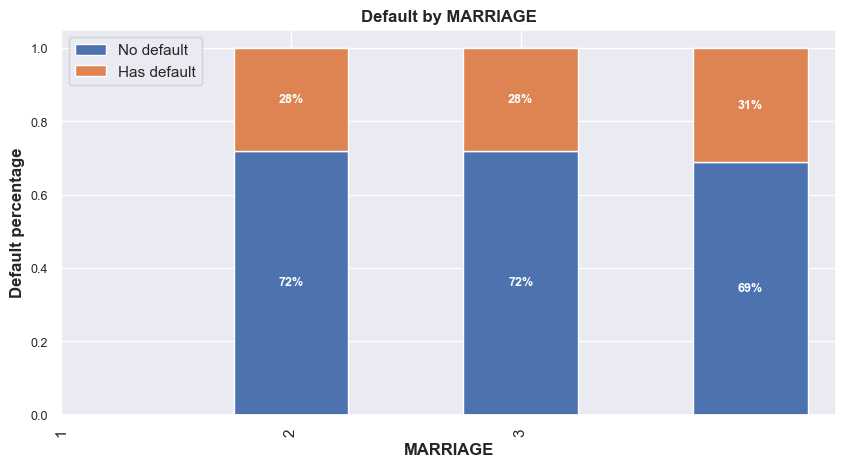

In [37]:
# Plot a stacked bar chart to visualize default and non-default distribution by marital status 

create_stacked_bar('MARRIAGE')

# (5) Do younger people tend to miss the payment deadline?
Customers aged between 30-50 had the lowest delayed payment rate, while younger groups (20-30) and older groups (50-70) all had higher delayed payment rates. However, the delayed rate dropped slightly again in customers older than 70 years.

In [38]:
# Segment the 'AGE' column to 6 groups

bins= [21,30,40,50,60,70,80]
labels = ['20-30','30-40','40-50','50-60','60-70','70-80']
df['AGE'] = pd.cut(df['AGE'],bins=bins, labels=labels,right=False)

# (6) Has the repayment status changed in the 6 month from April 2005 (PAY_6) to September 2005(PAY_0)?
There was a huge jump from May,2005 (PAY_5) to July, 2005 (PAY_3) when delayed payment increased significantly, then it peaked at August, 2005 (PAY_2), things started to get better in September, 2005 (PAY_1).

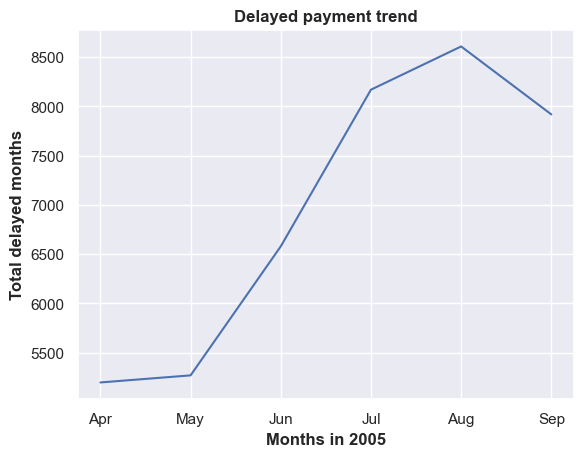

In [39]:
# Subset a dataframe with the records that have default

has_default = df[df['HAS_DEF']== 1]
default_trend = has_default[['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_0']].sum(axis=0)

# Draw a line chart to show the trend. The lower the number, the shorter delayed payment
fig,ax = plt.subplots()
ax.plot(default_trend)
plt.xticks(['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_0'],['Apr','May','Jun','Jul','Aug','Sep'])

plt.xlabel('Months in 2005',fontweight='bold')
plt.ylabel('Total delayed months',fontweight='bold')
plt.title('Delayed payment trend',fontweight='bold')

plt.show()

(7) Is there any correlation between bill amount and the delayed time?
There isn't an obvious correlation between bill amount and the total months of delay.

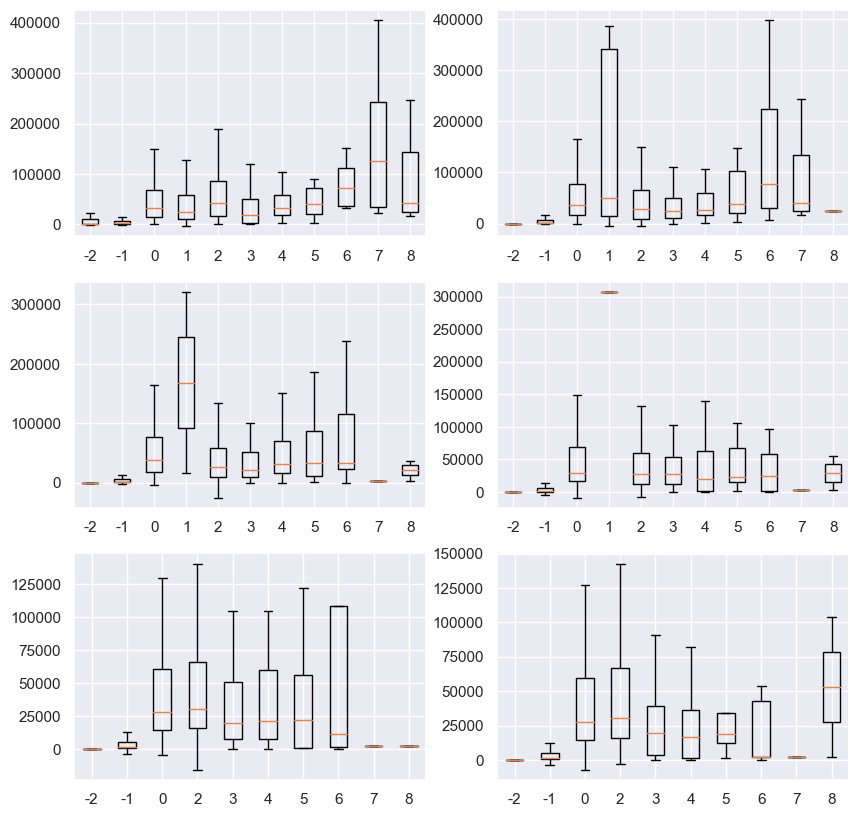

In [40]:
# Make 6 boxplots to visualize bill amounts and the total months of delayed payment

from matplotlib.pyplot import figure

# Make "PAY_1" to"PAY_6" , 'BILL_AMT1" to'BILL_AMT6" into a list respectively
pay_list = [ f"PAY_{i}" for i in [0,2,3,4,5,6,7] ]
bill_amt_list = [ f"BILL_AMT{i}" for i in range(1,7) ]

fig, ax = plt.subplots(3,2, figsize=(10, 10))

for pay, bill_amt, myax in zip(pay_list, bill_amt_list, ax.flatten()):
    
    # Prepare data for boxploting
    data = []
    for i in sorted(has_default[pay].unique()):
        temp = has_default.loc[has_default[pay] == i, bill_amt]
        data.append(temp)
        
    # Make boxplot for each PAY variable
    myax.boxplot(data, showfliers=False,) 
    myax.set_xticklabels(sorted(has_default[pay].unique()))
    
plt.show()


# (8) Is there any correlation between credit limit and the default payment next month?
Unsurprisingly, customers who had higher credit limits had lower delayed payment rates

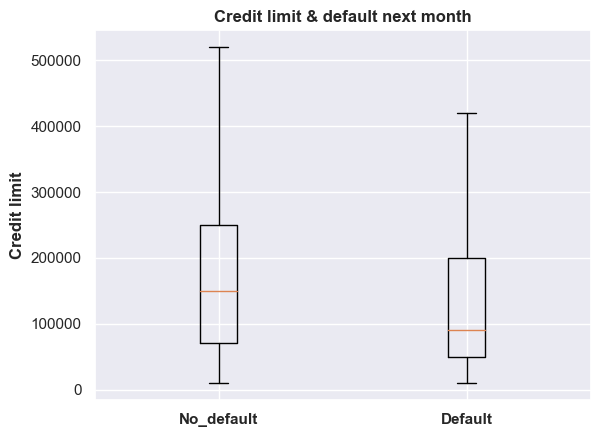

In [41]:
# Make a boxplot to visualize credit limit and default payment next month
# 1: default next month; 0: no default next month
df.rename(columns={'default payment next month':'DEF_PAY_NMO'},inplace = True)
def0 = df.loc[df['DEF_PAY_NMO'] == 0,'LIMIT_BAL']
def1 = df.loc[df['DEF_PAY_NMO'] == 1,'LIMIT_BAL']

fig, ax = plt.subplots()
ax.boxplot([def0, def1],  showfliers=False)

ax.set_xticklabels(['No_default',"Default"],fontweight ='bold')
ax.set_ylabel('Credit limit',fontweight ='bold')
ax.set_title('Credit limit & default next month',fontweight ='bold')

plt.show()

# (9) Why are there negative bills?
Interestingly enough, the minimals of those 6 bill columns are negative numbers. In general, there are 599-688 bills with negative amounts each month, which is less than 2% of total 30,000 records monthly. Also, the average negative amount in USD is 
102 which is a small amount. Therefore, an informed guess would be these are refunds from the last billing cycle. This will be investigated in data analysis.

In [42]:
# Get statistic summary of bill statement columns
# The min numbers are negative

bill = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
bill.describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [43]:
# How many bills have negative amount?
# There are 3932 bills with negative amounts, each month has 599-688 records 

bill_melt = pd.melt(bill, var_name = 'bill_cycle',value_name = 'amount')
neg_bill = bill_melt[bill_melt['amount']<0]
neg_bill.groupby('bill_cycle').count()

,amount
bill_cycle,
BILL_AMT1,590
BILL_AMT2,669
BILL_AMT3,655
BILL_AMT4,675
BILL_AMT5,655
BILL_AMT6,688


In [44]:
# Get the average amount of negative bill each month
# Use USD/NTD = 30 to get the amount in USD. The average negative amount is $38-$102

neg_bill_mean_ndt = neg_bill.groupby('bill_cycle')['amount'].mean()

print('Average negative amounts in NTD are: \n')
print(neg_bill_mean_ndt)
print('\nAverage negative amounts in USD are: \n')
print(neg_bill_mean_ndt/30)

Average negative amounts in NTD are: 

bill_cycle
BILL_AMT1   -1154.796610
BILL_AMT2   -1230.621824
BILL_AMT3   -1466.291603
BILL_AMT4   -1631.242963
BILL_AMT5   -1634.708397
BILL_AMT6   -3074.492733
Name: amount, dtype: float64

Average negative amounts in USD are: 

bill_cycle
BILL_AMT1    -38.493220
BILL_AMT2    -41.020727
BILL_AMT3    -48.876387
BILL_AMT4    -54.374765
BILL_AMT5    -54.490280
BILL_AMT6   -102.483091
Name: amount, dtype: float64


# (10) Why are some bill statement amounts greater than credit limit? Could it be late payment interest?
The common sense is that the bill statement amount shouldn't exceed credit limit, however, there are 3931 customers whose bill amounts are greater than credit limit. Could the difference be late payment interest assuming these customers had delayed payment?

In [45]:
# Is there any bill amount that is greater than credit limit?

condition1 = df['BILL_AMT1'] > df['LIMIT_BAL'] 
condition2 = df['BILL_AMT2'] > df['LIMIT_BAL'] 
condition3 = df['BILL_AMT3'] > df['LIMIT_BAL'] 
condition4 = df['BILL_AMT4'] > df['LIMIT_BAL'] 
condition5 = df['BILL_AMT5'] > df['LIMIT_BAL'] 
condition6 = df['BILL_AMT6'] > df['LIMIT_BAL'] 

large_bill = df[condition1 | condition2 |condition3 | condition4 | condition5 | condition6]
large_bill.shape

(3931, 25)

In [46]:
large_bill["HAS_DEF"].value_counts()

0    2184
1    1747
Name: HAS_DEF, dtype: int64

# (11) Why did customers who had no consumption in 6 months then default in the next month?
First explore if there is any customer who never had consumption and the data shows there are 870 customers who were inactive in 6 months. Then check against the 'default.payment.next.month' column to see if these customers all had no default. The common sense should be no default payment next month if the previous bill was 0. However, we see there are 317 "1"s which means default in the next month. We will investigate this in the data analysis process.

In [47]:
# Is there any customer who never had any transaction, meaning bill amount in 6 months remained as 0
# There are 870 customers whose bill amount was 0 in 6 months

bill_amt = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
no_transaction = bill_amt[bill_amt.sum(axis=1) ==0]
no_transaction

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
ID,,,,,,
19,0,0,0,0,0,0
20,0,0,0,0,0,0
46,0,0,0,0,0,0
80,0,0,0,0,0,0
122,0,0,0,0,0,0
...,...,...,...,...,...,...
29909,0,0,0,0,0,0
29910,0,0,0,0,0,0
29974,0,0,0,0,0,0


In [48]:
# Check if those 870 customers defaulted in the next month (Oct.2005)
# The assumption is since they did not have any consumption, they shouldn't default, so there shouldn't be any '1'

no_transaction_de = df.loc[no_transaction.index,['DEF_PAY_NMO']]
no_transaction_de

,DEF_PAY_NMO
ID,
19,0
20,0
46,1
80,1
122,1
...,...
29909,1
29910,0
29974,1


In [49]:
# How many inactive customers had default payment next month
# 317 customers had default payment next month which is against common sense

no_transaction_de['DEF_PAY_NMO'].value_counts()

0    553
1    317
Name: DEF_PAY_NMO, dtype: int64

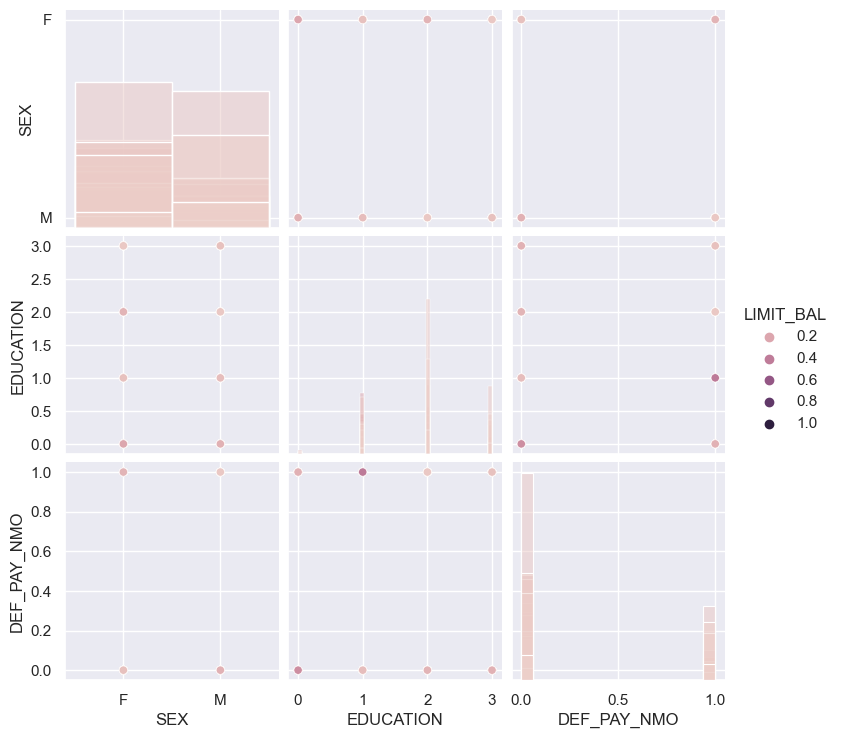

In [50]:
sns.pairplot(df, hue="LIMIT_BAL", kind = 'scatter', vars = ['SEX','EDUCATION','DEF_PAY_NMO'],diag_kind = 'hist')

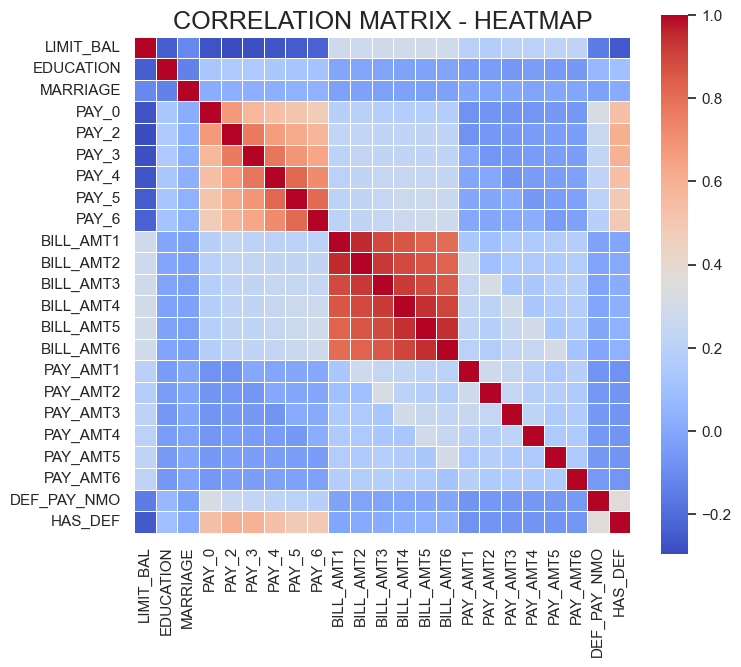

In [51]:
#  looking at correlations matrix, defined via Pearson function  
corr = df.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

In [52]:
df.corr()

,LIMIT_BAL,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY_NMO,HAS_DEF
LIMIT_BAL,1.000000,-0.245297,-0.111012,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,...,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520,-0.260632
EDUCATION,-0.245297,1.000000,-0.133203,0.132036,0.155089,0.148547,0.140184,0.125987,0.115256,-0.007782,...,-0.020748,-0.015250,-0.045016,-0.041682,-0.060422,-0.042594,-0.051162,-0.055922,0.065685,0.102874
MARRIAGE,-0.111012,-0.133203,1.000000,0.018557,0.023620,0.032399,0.031831,0.034377,0.033168,-0.027832,...,-0.029270,-0.025066,-0.004653,-0.009513,-0.004250,-0.013970,-0.003019,-0.008383,-0.027575,0.007852
PAY_0,-0.271214,0.132036,0.018557,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,...,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794,0.532712
PAY_2,-0.296382,0.155089,0.023620,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,...,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551,0.603757
PAY_3,-0.286123,0.148547,0.032399,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,...,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253,0.593539
PAY_4,-0.267460,0.140184,0.031831,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,...,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614,0.535518
PAY_5,-0.249411,0.125987,0.034377,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.206684,...,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149,0.491637
PAY_6,-0.235195,0.115256,0.033168,0.474553,0.575501,0.632684,0.716449,0.816900,1.000000,0.207373,...,0.290894,0.285091,-0.001496,-0.005223,0.005834,0.019018,-0.046434,-0.025299,0.186866,0.493284
BILL_AMT1,0.285430,-0.007782,-0.027832,0.187068,0.234887,0.208473,0.202812,0.206684,0.207373,1.000000,...,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341,-0.019644,-0.010157


The heatmat shows that features are correlated with each other (collinearity), such us like PAY_0,2,3,4,5,6 and BILL_AMT1,2,3,4,5,6. In those cases, the correlation is positive.

Uncorrelated data are poentially more useful: discriminatory!

What do correlations mean?

Lets separately fit correlated and uncorrelated data via linear regression:

# Linear Regression

Uncorrelated data are poentially more useful: discrimentory!


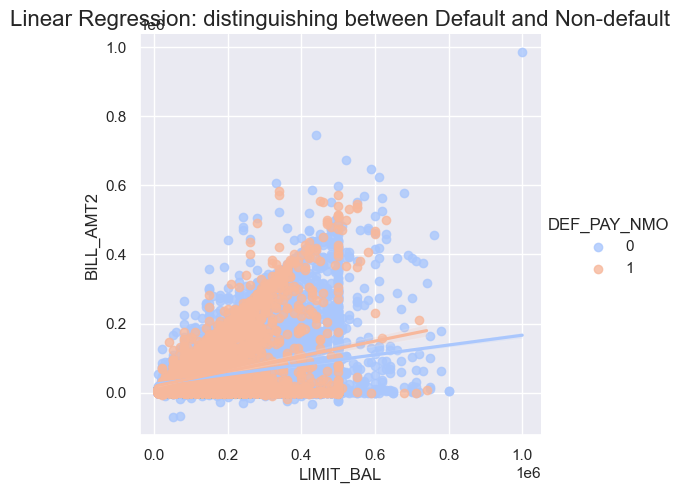

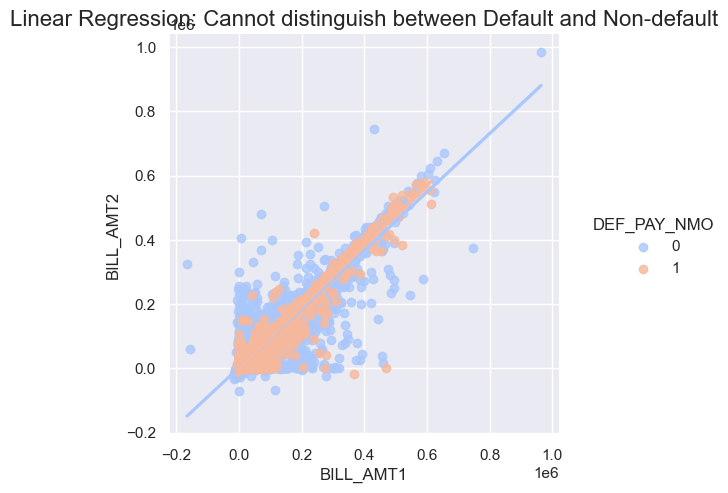

In [53]:
sns.lmplot(x='LIMIT_BAL', y= 'BILL_AMT2', data = df, hue ='DEF_PAY_NMO', 
           palette='coolwarm')
plt.title('Linear Regression: distinguishing between Default and Non-default', size=16)


sns.lmplot(x='BILL_AMT1', y= 'BILL_AMT2', data = df, hue ='DEF_PAY_NMO', 
           palette='coolwarm')
plt.title('Linear Regression: Cannot distinguish between Default and Non-default', size=16);

print('Uncorrelated data are poentially more useful: discrimentory!')

# Machine Learning: Classification models
The classification models used for this analysis are: Logistic Regression, Decision Tree and Random Forest Classifier.

To build machine learning models the original data was divided into features (X) and target (y) and then split into train (80%) and test (20%) sets. Thus, the algorithms would be trained on one set of data and tested out on a completely different set of data (not seen before by the algorithm).

In [54]:
# Original dataset
from sklearn.model_selection import train_test_split
# to split the data into two parts
X = df.drop('DEF_PAY_NMO', axis=1)  
y = df['DEF_PAY_NMO']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [55]:
# Dataset with standardized features
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['SEX'] = le.fit_transform(df['SEX'])
df['AGE'] = le.fit_transform(df['AGE'])
#LabelEncoder()
features = np.asarray(df.drop('DEF_PAY_NMO', axis = 1, inplace = False))
print(df.info())
stdX = (features - features.mean()) / (features.std()) 
#stdX = np.divide(int(np.subtract(features,features.mean())),int(features.std()))
Xstd_train, Xstd_test, ystd_train, ystd_test = train_test_split(stdX,y, test_size=0.2, stratify=y, random_state=42)
   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   LIMIT_BAL    30000 non-null  int64
 1   SEX          30000 non-null  int32
 2   EDUCATION    30000 non-null  int64
 3   MARRIAGE     30000 non-null  int64
 4   AGE          30000 non-null  int32
 5   PAY_0        30000 non-null  int64
 6   PAY_2        30000 non-null  int64
 7   PAY_3        30000 non-null  int64
 8   PAY_4        30000 non-null  int64
 9   PAY_5        30000 non-null  int64
 10  PAY_6        30000 non-null  int64
 11  BILL_AMT1    30000 non-null  int64
 12  BILL_AMT2    30000 non-null  int64
 13  BILL_AMT3    30000 non-null  int64
 14  BILL_AMT4    30000 non-null  int64
 15  BILL_AMT5    30000 non-null  int64
 16  BILL_AMT6    30000 non-null  int64
 17  PAY_AMT1     30000 non-null  int64
 18  PAY_AMT2     30000 non-null  int64
 19  PAY_AMT3     30000 non-null  int64
 20  PAY_AM

# Recursive Feature Elimination¶
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [56]:
NUM_FEATURES = 3
model = LogisticRegression()
#rfe_stand = RFE(model, NUM_FEATURES)
rfe_stand = RFE(estimator=model, n_features_to_select=NUM_FEATURES)
fit_stand = rfe_stand.fit(stdX, y)
#print("St Model Num Features:", fit_stand.n_features_)
#print("St Model Selected Features:", fit_stand.support_)
print("Std Model Feature Ranking:", fit_stand.ranking_)
# calculate the score for the selected features
score_stand = rfe_stand.score(stdX,y)
print("Standardized Model Score with selected features is: %f (%f)" % (score_stand.mean(), score_stand.std()))

Std Model Feature Ranking: [ 7 16 21 22 17 10 11 12 13 14 15  2  1  9 20  6  8  1  1  4  3  5 18 19]
Standardized Model Score with selected features is: 0.778800 (0.000000)


# Logistic Regression 

In [57]:
#calling logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(Xstd_train, ystd_train)
print(logreg.coef_)
print(logreg.intercept_)

[[-0.16820222  0.05882372  0.05875492  0.05830818  0.05903063  0.06218873
   0.06133633  0.06098889  0.06072807  0.06043329  0.0603     -0.27035553
   0.17552882  0.0235313   0.06367216  0.18218348  0.04694485 -1.10538824
  -0.72283612 -0.30067649 -0.36059437 -0.14898503 -0.08781275  0.06029188]]
[-0.1770061]


In [58]:
#fitting the model with x and y attributes of train data
#in this it is goin to learn the pattern
logreg.fit(Xstd_train, ystd_train)

LogisticRegression(class_weight='balanced')

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [59]:
#now applying our learnt model on test and also on train data
y_log_pred_test = logreg.predict(Xstd_train)
y_log_pred_train = logreg.predict(Xstd_train)

In [60]:
y_log_pred_test.shape

(24000,)

In [61]:
y_log_pred_train.shape

(24000,)

In [62]:
y_log_pred_test

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

# CONFUSION MATRIX

In [63]:
#creating a confusion matrix to understand the classification
conf = metrics.confusion_matrix(ystd_train, y_log_pred_test)
conf

array([[9212, 9479],
       [1485, 3824]], dtype=int64)

In [64]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(ystd_train, y_log_pred_test)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print ("TP",TP)
print ("TN",TN)
print("FN",FN)
print ("FP",FP)

[[9212 9479]
 [1485 3824]]
TP 3824
TN 9212
FN 1485
FP 9479


<AxesSubplot:>

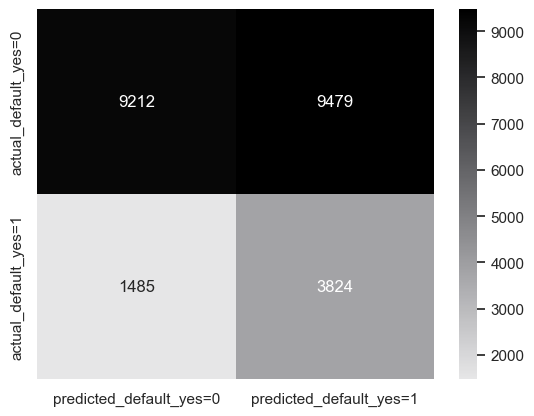

In [65]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['predicted_default_yes=0','predicted_default_yes=1'],yticklabels=['actual_default_yes=0','actual_default_yes=1'],annot=True, fmt="d")

TrueNegative(TN) = 2508 cases, which are nondefault and predicted as nondefault as well.

TruePositive(TP) = 88 cases, which are default and predicted as default as well.

FalseNegative(FN) = 21 cases, which are actually default but predicted as nondefault.

FalsePositive(FP) = 383 cases, which are actually nondefault but predicted as default

In [66]:
# print the first 25 true and predicted responses
print('True', ystd_train.values[0:15])
print('Pred', y_log_pred_test[0:15])

True [0 0 0 1 0 1 0 1 0 0 0 1 1 0 0]
Pred [1 1 1 1 0 0 0 1 0 1 1 0 1 0 1]


# Metrics computed from a confusion matrix

1.Classification Accuracy: Overall, how often is the classifier correct? This is discussed above in detail under the classification accuracy.

In [67]:
#comparing the metrics of predicted lebel and real label of test data
print('Accuracy_Score:', metrics.accuracy_score(ystd_train, y_log_pred_test))

Accuracy_Score: 0.5431666666666667


This suggest that 86.5% observations of credit defaults rates are correctly or accurately observe by our model

# .Classification Error: Overall, how often is the classifier incorrect?. It is nothing but (1-classification accuracy)

Also known as "Misclassification Rate"

In [68]:
 # Method to calculate Classification Error
    

print('Classification Error:',1 - metrics.accuracy_score(ystd_train, y_log_pred_test))

Classification Error: 0.4568333333333333


# 3.Sensitivity or Recall: When the actual value is positive, how often is the prediction correct? 

In [69]:
# Method to calculate Sensitivity

print('Sensitivity or Recall:', metrics.recall_score(ystd_train, y_log_pred_test))

Sensitivity or Recall: 0.7202863062723677


# 4.Specificity: When the actual value is negative, how often is the prediction correct?

In [70]:
specificity = TN / (TN + FP)

print(specificity)

0.4928575250120379


In [81]:
#Defining a sample data to test the model
# As we discussed earlier, income has no significance in default. So only balance is considered as input & X = cred_df[['balance']]

feature_cols = ['balance']
data =[817.18]
studentid_2=pd.DataFrame([data],columns=feature_cols)
studentid_2.head()

,balance
0,817.18


# Receiver Operating Characteristic (ROC) Curves

In [82]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(Xstd_train)[:, 1]


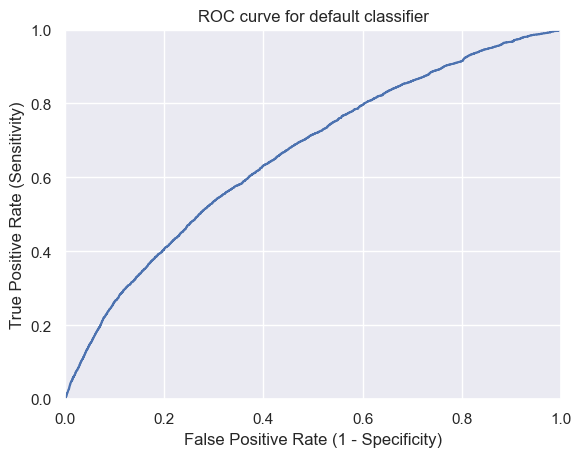

In [83]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(ystd_train, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for default classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

# Decision Tree

In [142]:
from sklearn import tree

In [143]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [144]:
clf = clf.fit(Xstd_train, ystd_train)

In [145]:
(clf.predict(Xstd_train)==ystd_train).mean()

0.9975416666666667

In [146]:
clf.predict(Xstd_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

[Text(0.5272773684094161, 0.9886363636363636, 'X[23] <= -0.346\nentropy = 0.762\nsamples = 24000\nvalue = [18691, 5309]'),
 Text(0.23970861357402026, 0.9659090909090909, 'X[11] <= -0.332\nentropy = 0.546\nsamples = 17276\nvalue = [15100, 2176]'),
 Text(0.12599631312093762, 0.9431818181818182, 'X[19] <= -0.346\nentropy = 0.766\nsamples = 3074\nvalue = [2387, 687]'),
 Text(0.09999909784304956, 0.9204545454545454, 'X[4] <= -0.346\nentropy = 0.864\nsamples = 1551\nvalue = [1107, 444]'),
 Text(0.08284598249730056, 0.8977272727272727, 'X[11] <= -0.336\nentropy = 0.84\nsamples = 1411\nvalue = [1031, 380]'),
 Text(0.05260479245620907, 0.875, 'X[0] <= 0.097\nentropy = 0.855\nsamples = 1338\nvalue = [964, 374]'),
 Text(0.005194218608852755, 0.8522727272727273, 'X[15] <= -0.343\nentropy = 0.998\nsamples = 61\nvalue = [32, 29]'),
 Text(0.0036133694670280035, 0.8295454545454546, 'X[1] <= -0.346\nentropy = 0.99\nsamples = 50\nvalue = [22, 28]'),
 Text(0.0018066847335140017, 0.8068181818181818, 'X[2]

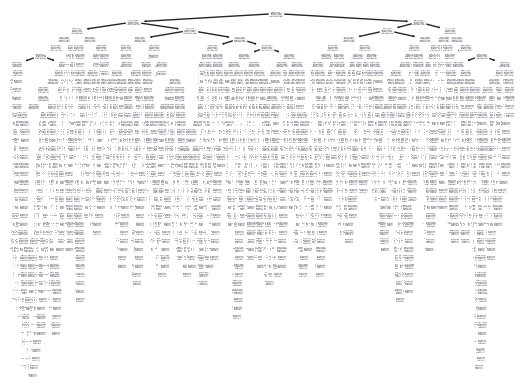

In [147]:
tree.plot_tree(clf)

# Bagging

In [100]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

In [101]:
clf = BaggingClassifier(SVC(),n_estimators=10, random_state=0).fit(Xstd_train, ystd_train)

In [102]:
(clf.predict(Xstd_train)==ystd_train).mean()

0.779125

# Random Forest


In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(Xstd_train, ystd_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [74]:
(clf.predict(Xstd_train)==ystd_train).mean()

0.7993333333333333

# Boosting

In [75]:
from sklearn.ensemble import AdaBoostClassifier

In [76]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(Xstd_train, ystd_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [77]:
(clf.predict(Xstd_train)==ystd_train).mean()

0.8213333333333334

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

In [91]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=0).fit(Xstd_train, ystd_train)

In [92]:
(clf.predict(Xstd_train)==ystd_train).mean()

0.8231666666666667

# Voting

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [95]:
clf1 = LogisticRegression(max_iter=5000,multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
eclf1 = VotingClassifier(estimators=[
         ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1 = eclf1.fit(Xstd_train,ystd_train)

In [96]:
(eclf1.predict(Xstd_train)==ystd_train).mean()

0.9609166666666666

In [97]:
np.array_equal(eclf1.named_estimators_.lr.predict(Xstd_train),
                eclf1.named_estimators_['lr'].predict(Xstd_train))

True

In [98]:
eclf2 = VotingClassifier(estimators=[
         ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
         voting='soft')
eclf2 = eclf2.fit(Xstd_train,ystd_train)

In [99]:
(eclf2.predict(Xstd_train)==ystd_train).mean()

0.9512916666666666

# Naive Bayes

In [103]:
from sklearn.naive_bayes import GaussianNB

In [104]:
clf = GaussianNB()
clf.fit(Xstd_train,ystd_train)

GaussianNB()

In [105]:
clf.predict(Xstd_train)

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [106]:
(clf.predict(Xstd_train)==ystd_train).mean()

0.4221666666666667

# SVM

In [107]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [108]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [109]:
clf.fit(Xstd_train,ystd_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [110]:
clf.predict(Xstd_train)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [111]:
(clf.predict(Xstd_train)==ystd_train).mean()

0.826375

In [112]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='sigmoid'))

In [113]:
clf.fit(Xstd_train,ystd_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', kernel='sigmoid'))])

In [114]:
(clf.predict(Xstd_train)==ystd_train).mean()

0.698375

In [120]:
from sklearn.svm import LinearSVC
clf = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5))

In [121]:
clf.fit(Xstd_train,ystd_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

In [122]:
(clf.predict(Xstd_train)==ystd_train).mean()

0.8135833333333333

# KNN

In [123]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(Xstd_train,ystd_train)

KNeighborsClassifier(n_neighbors=3)

In [124]:
neigh.predict_proba(Xstd_train)

array([[0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [125]:
print("Training accuracy: ", neigh.score(Xstd_train,ystd_train))

Training accuracy:  0.845875


In [126]:
np.mean(np.array([neigh.score(Xstd_train,ystd_train)]))

0.845875

In [127]:
yhat = neigh.predict(Xstd_test)

In [128]:
prediction = list(map(round, yhat))

In [129]:
# comparing original and predicted values of y
print('Actual values', list(y_test.values))
print('Predictions :', prediction)

Actual values [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0

In [130]:
from sklearn.metrics import (confusion_matrix, accuracy_score)
  
# confusion matrix
cm = confusion_matrix(y_test, prediction) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, prediction))

Confusion Matrix : 
 [[4131  542]
 [1057  270]]
Test accuracy =  0.7335


In [132]:
## Accuracy with k-nearest neighbors

# Prediction with training dataset:
y_pred_neigh_train = neigh.predict(Xstd_train)

# Prediction with testing dataset:
y_pred_neigh_test = neigh.predict(Xstd_test)

# Find accuracy
accuracy_neigh =  accuracy_score(ystd_test, prediction)
print("Accuracy for K-nearest neighbors: ", accuracy_neigh)

Accuracy for K-nearest neighbors:  0.7335


# LASSO Classifier

In [133]:
lasso = LogisticRegression(random_state=0,penalty='l1',solver='liblinear').fit(Xstd_train,ystd_train)
print('Probabilities: ', lasso.predict_proba(Xstd_train))
print(" ")
print('Training Accuracy: ' ,lasso.score(Xstd_train,ystd_train))
np.mean(np.array([lasso.score(Xstd_train,ystd_train)]))
yhat = lasso.predict(Xstd_test)
prediction = list(map(round, yhat))

Probabilities:  [[0.70615192 0.29384808]
 [0.75957219 0.24042781]
 [0.67538519 0.32461481]
 ...
 [0.75787226 0.24212774]
 [0.85871175 0.14128825]
 [0.83816357 0.16183643]]
 
Training Accuracy:  0.7787916666666667


In [134]:
from sklearn.metrics import (confusion_matrix, accuracy_score)
  
# confusion matrix
cm = confusion_matrix(ystd_test, prediction) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(ystd_test, prediction))

Confusion Matrix : 
 [[4673    0]
 [1327    0]]
Test accuracy =  0.7788333333333334


In [135]:
## Accuracy with lasso classifier

# Prediction with training dataset:
y_pred_lasso_train = lasso.predict(Xstd_train)

# Prediction with testing dataset:
y_pred_lasso_test = lasso.predict(Xstd_test)

# Find accuracy
accuracy_lasso =  accuracy_score(ystd_test, prediction)
print("Accuracy for lasso: ", accuracy_lasso)

Accuracy for lasso:  0.7788333333333334


# Elastic Net Classifier 

In [136]:
enet = LogisticRegression(random_state=0,penalty='elasticnet',solver='saga',l1_ratio=0.5).fit(Xstd_train,ystd_train)

In [138]:
print('Probabilities: ', enet.predict_proba(Xstd_train))
print(" ")
print('Train Accuracy: ' ,enet.score(Xstd_train,ystd_train))
np.mean(np.array([enet.score(Xstd_train,ystd_train)]))
yhat = enet.predict(Xstd_test)
prediction = list(map(round, yhat))

Probabilities:  [[0.70513056 0.29486944]
 [0.75961841 0.24038159]
 [0.67551099 0.32448901]
 ...
 [0.75804928 0.24195072]
 [0.85872036 0.14127964]
 [0.83809873 0.16190127]]
 
Train Accuracy:  0.7787916666666667


In [139]:
from sklearn.metrics import (confusion_matrix, accuracy_score)
  
# confusion matrix
cm = confusion_matrix(ystd_test, prediction) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(ystd_test, prediction))

Confusion Matrix : 
 [[4673    0]
 [1327    0]]
Test accuracy =  0.7788333333333334


In [140]:
## Accuracy with enet classifier

# Prediction with training dataset:
y_pred_enet_train = enet.predict(Xstd_train)

# Prediction with testing dataset:
y_pred_enet_test = enet.predict(Xstd_test)

# Find accuracy
accuracy_enet =  accuracy_score(ystd_test, prediction)
print("Accuracy for enet: ", accuracy_enet)

Accuracy for enet:  0.7788333333333334


# Which model is best and accurate

In [ ]:
Out of all the models Decision tree is best model and accurate which 0.9975